In [2]:
'''
datasets:
	basic_stats
	customer_zipcodes
	age_distribution
	gender_distribution
	payment_distribution
	demographic distribution
	expenditure-time_curve
    
    
merchants Number of merchants 
cards Number of differents cards 
payments Number of transactions 
avg payment Average transaction 
max payment Maximum transaction 
min payment Minimum transaction 
std Standard deviation    
'''

'\ndatasets:\n\tbasic_stats\n\tcustomer_zipcodes\n\tage_distribution\n\tgender_distribution\n\tpayment_distribution\n\tdemographic distribution\n\texpenditure-time_curve\n    \n    \nmerchants Number of merchants \ncards Number of differents cards \npayments Number of transactions \navg payment Average transaction \nmax payment Maximum transaction \nmin payment Minimum transaction \nstd Standard deviation    \n'

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [77]:
folder = "../dataset/"
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

#age distribution
names=['zipcode','date','category','ageinterval','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
age_distribution = pd.io.parsers.read_table(folder + 'age_distribution000',sep='\t', names=names, parse_dates=["date"])


basic_stats["amount"] = basic_stats["payment"]* basic_stats["avg"]
basic_stats["avgpaybymerch"] = basic_stats["payment"]/ basic_stats["merchant"]
basic_stats["amountbymerch"] = basic_stats["amount"]/ basic_stats["merchant"]
basic_stats["avgReppays"] = basic_stats["payment"] / basic_stats["card"]
basic_stats["weekday"] = basic_stats["date"].map(lambda d: (d.weekday()))
basic_stats["day"] = basic_stats["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))
#print basic_stats.describe()

In [5]:
basic_stats[:1]

,zipcode,date,category,merchant,card,payment,avg,max,min,std,amount,avgpaybymerch,amountbymerch,avgReppays,weekday,day
0,8001,2014-07-01,es_barsandrestaurants,76,405,410,27.28,600,0.1,47.253606,11184.8,5.394737,147.168421,1.012346,1,01-Tue


In [78]:
#total de pasta en el mes de julio
print basic_stats["amount"].sum()
restaurants=basic_stats[basic_stats["category"]=="es_barsandrestaurants"]
restaurants_bcn=restaurants[restaurants["zipcode"]<=8042]
print restaurants["amount"].sum()
print restaurants_bcn["amount"].sum()

214150826.66
27152838.06
11344969.55


(array([   6.,   13.,   16.,   21.,   56.,   70.,   84.,   80.,   94.,
         117.,  132.,  116.,   99.,   66.,   36.,   42.,   30.,   26.,
          25.,   17.,   14.,    7.,    6.,    5.,    6.,    3.,    5.,
           4.,    2.,    5.,    4.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    1.]),
 array([  1.   ,   1.374,   1.748,   2.122,   2.496,   2.87 ,   3.244,
          3.618,   3.992,   4.366,   4.74 ,   5.114,   5.488,   5.862,
          6.236,   6.61 ,   6.984,   7.358,   7.732,   8.106,   8.48

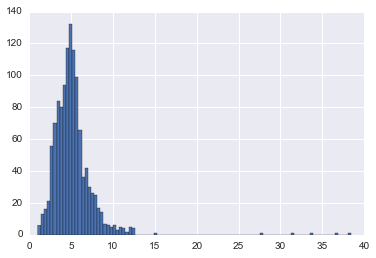

In [85]:
column="payment"#avgpaybymerch"#"min"#"max"#min" #"avgpaybymerch" #"amountbymerch"

plt.hist(restaurants_bcn["avgpaybymerch"],bins=100)

In [44]:
zipcodes=pd.Series(restaurants_bcn["zipcode"].ravel()).unique()
print zipcodes
zipcodes

[8001 8002 8003 8004 8005 8006 8007 8008 8009 8010 8011 8012 8013 8014 8015
 8016 8017 8018 8019 8020 8021 8022 8023 8024 8025 8026 8027 8028 8029 8030
 8031 8032 8034 8035 8036 8037 8038 8040 8041 8042 8100 8105 8110 8120 8130
 8140 8150 8160 8170 8172 8173 8174 8181 8184 8185 8186 8191 8192 8197 8201
 8202 8203 8204 8205 8206 8207 8208 8210 8211 8213 8221 8222 8223 8224 8225
 8226 8227 8228 8230 8241 8242 8243 8250 8251 8260 8271 8272 8290 8291 8292
 8295 8301 8302 8303 8304 8310 8320 8328 8329 8330 8339 8340 8348 8349 8350
 8358 8360 8370 8380 8389 8390 8392 8397 8401 8402 8403 8420 8430 8440 8450
 8460 8470 8480 8490 8500 8520 8521 8530 8540 8551 8560 8570 8600 8620 8630
 8635 8640 8650 8670 8700 8720 8730 8740 8750 8755 8757 8758 8759 8760 8770
 8780 8783 8784 8786 8788 8790 8800 8810 8820 8830 8840 8850 8859 8860 8870
 8880 8901 8902 8903 8905 8906 8907 8908 8911 8912 8913 8914 8915 8917 8918
 8921 8922 8930 8940 8950 8960 8970 8980]


array([8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011,
       8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022,
       8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8034,
       8035, 8036, 8037, 8038, 8040, 8041, 8042, 8100, 8105, 8110, 8120,
       8130, 8140, 8150, 8160, 8170, 8172, 8173, 8174, 8181, 8184, 8185,
       8186, 8191, 8192, 8197, 8201, 8202, 8203, 8204, 8205, 8206, 8207,
       8208, 8210, 8211, 8213, 8221, 8222, 8223, 8224, 8225, 8226, 8227,
       8228, 8230, 8241, 8242, 8243, 8250, 8251, 8260, 8271, 8272, 8290,
       8291, 8292, 8295, 8301, 8302, 8303, 8304, 8310, 8320, 8328, 8329,
       8330, 8339, 8340, 8348, 8349, 8350, 8358, 8360, 8370, 8380, 8389,
       8390, 8392, 8397, 8401, 8402, 8403, 8420, 8430, 8440, 8450, 8460,
       8470, 8480, 8490, 8500, 8520, 8521, 8530, 8540, 8551, 8560, 8570,
       8600, 8620, 8630, 8635, 8640, 8650, 8670, 8700, 8720, 8730, 8740,
       8750, 8755, 8757, 8758, 8759, 8760, 8770, 87

In [33]:
rowsinzipcodes=[]
for zipcode in zipcodes
    rowsinzipcodes

(188,)

In [72]:
by='zipcode'
#by='day'
#by='weekday'
pivbasic_stats=pd.pivot_table(restaurants_bcn, values='payment', index=[by],columns = ['weekday'], aggfunc=np.sum)
pivbasic_stats=pivbasic_stats.fillna(1) 
pivbasic_stats

weekday,0,1,2,3,4,5,6
zipcode,,,,,,,
8001,1746,2073,2248,2392,1744,1673,1371
8002,2430,3085,3075,3135,2693,3037,2511
8003,1554,2639,2836,3083,2545,3343,3128
8004,767,1137,1018,1128,948,903,866
8005,2405,3417,3703,3857,3271,3054,3258
8006,2682,3697,3718,3988,3386,2694,2304
8007,1707,2345,2407,2402,2019,1834,1335
8008,2465,3265,3458,3641,2689,1816,1082
8009,1325,1776,1770,1843,1345,487,347


In [73]:
restaurants_age=age_distribution[age_distribution["category"]=="es_barsandrestaurants"]
restaurants_age_bcn=restaurants_age[restaurants_age["zipcode"]<=8042]

by='zipcode'
#by='day'
#by='weekday'
pivbasic_stats=pd.pivot_table(restaurants_age_bcn, values='payment', index=[by],columns = ['ageinterval'], aggfunc=np.sum)
pivbasic_stats=pivbasic_stats.fillna(1) 
pivbasic_stats

ageinterval,25-34,35-44,45-54,55-64,<25,>=65,unknown
zipcode,,,,,,,
8001,884,662,117,45,40,1,9033
8002,1569,866,203,27,184,1,14787
8003,1733,1425,340,34,54,5,13244
8004,109,62,5,1,30,1,4668
8005,2285,2394,597,27,245,1,15334
8006,980,1016,276,71,57,1,17492
8007,1932,1480,453,79,208,1,7565
8008,853,1207,493,74,34,5,13235
8009,76,105,49,1,1,1,6888


In [71]:

#customer_zipcodes
folder = "../dataset/"
names=['zipcode','date','category','zipcodecustomer','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
customer_zipcodes = pd.io.parsers.read_table(folder + 'customer_zipcodes000',sep='\t', names=names, parse_dates=["date"])

restaurant_customer_zipcodes=customer_zipcodes[age_distribution["category"]=="es_barsandrestaurants"]
restaurant_customer_zipcodes_bcn=restaurant_customer_zipcodes[restaurant_customer_zipcodes["zipcode"]<=8042]


queryfrom="""

SELECT zipcode,zipcodecustomer,sum(payment) total
FROM restaurant_customer_zipcodes_bcn 
where category="es_barsandrestaurants" and zipcodecustomer !="unknown"
group by zipcode, zipcodecustomer 
order by zipcode, zipcodecustomer 

"""

print pysqldf(queryfrom)


     zipcode zipcodecustomer  total
0       8001           00000      5
1       8001           08001     94
2       8001           08002      5
3       8001           08004     18
4       8001           08005      5
5       8001           08011      6
6       8001           08013      5
7       8001           08015     52
8       8001           08017      5
9       8001           08018      6
10      8001           08020     10
11      8001           08024      5
12      8001           08025      5
13      8001           08028     11
14      8001           08029      5
15      8001           28002    151
16      8002           08002     17
17      8002           08003     26
18      8002           08015     15
19      8002           08018     10
20      8002           08026      7
21      8002           08028      7
22      8002           08029      5
23      8002           08100      8
24      8003           00000     18
25      8003           08003    116
26      8003           08004

In [74]:
by='zipcode'
pivbasic_stats=pd.pivot_table(restaurant_customer_zipcodes_bcn, values='payment', index=[by],columns = ['zipcodecustomer'], aggfunc=np.sum)
pivbasic_stats=pivbasic_stats.fillna(1) 
pivbasic_stats

zipcodecustomer,00000,08001,08002,08003,08004,08005,08006,08007,08008,08009,...,08940,08950,08960,08970,08980,25001,28002,28230,43700,unknown
zipcode,,,,,,,,,,,,,,,,,,,,,
8001,5,362,5,1,45,12,1,1,1,1,...,1,1,1,1,1,1,151,1,1,11880
8002,30,89,134,148,53,41,8,1,1,5,...,16,14,6,24,1,5,1,1,1,39862
8003,18,1,1,608,5,31,7,1,1,1,...,1,1,1,1,1,1,75,1,1,9589
8004,1,1,1,1,788,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2907
8005,1,1,1,13,18,2021,1,1,1,1,...,5,1,1,1,1,1,40,1,1,17937
8006,56,1,1,1,15,364,2205,1,1,68,...,178,239,53,89,55,1,315,1655,221,27601
8007,16,1,1,1,13,27,12,49,1,16,...,13,5,1,1,1,1,31,1,1,9985
8008,1,1,1,1,1,5,23,1,40,1,...,1,1,1,1,1,1,118,1,1,5315
8009,1,1,1,1,1,1,1,1,1,242,...,1,1,1,1,1,1,51,1,1,3612
